In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Read zhe data
weather = pd.read_csv("ny_data.csv")
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather.set_index('DATE', inplace=True)

/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_62110/149157976.py:2: DtypeWarning: Columns (7,11,17,23,31,33,35,37,39,41,43,45,47,49,51,53,55,65,67,69,71,73,75,77,79,81,83,85,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("ny_data.csv")


In [44]:
# Clean up data
# Find percentage of null values
weather.apply(pd.isnull).sum()/weather.shape[0]

# Data documentation
# PRCP - Precipitation
# TMAX - Max Temperature
# SNOW - Snow
# TMIN - Min Temperature

STATION            0.000000
NAME               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
                     ...   
WT19_ATTRIBUTES    0.990950
WT21               0.999949
WT21_ATTRIBUTES    0.999949
WT22               0.995702
WT22_ATTRIBUTES    0.995702
Length: 89, dtype: float64

In [45]:
weather_data = weather[["PRCP", "SNOW", "TMAX", "TSUN", "TMIN"]].copy()
# Check if NaNs present
# Fill them with ffill
weather_data = weather_data.fillna(method="ffill")
weather_data.apply(pd.isnull).sum()

/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_62110/2593277235.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data = weather_data.fillna(method="ffill")


PRCP    0
SNOW    0
TMAX    0
TSUN    0
TMIN    0
dtype: int64

In [27]:
weather_data

,PRCP,SNOW,TMAX,TSUN,TMIN
DATE,,,,,
1970-01-01,0.00,0.0,25,36.0,19
1970-01-02,0.00,0.0,30,492.0,18
1970-01-03,0.04,0.0,36,0.0,25
1970-01-04,0.00,0.0,31,504.0,20
1970-01-05,0.00,0.0,34,504.0,18
...,...,...,...,...,...
2024-02-20,0.00,0.0,40,0.0,26
2024-02-21,0.00,0.0,43,0.0,30
2024-02-22,0.04,0.0,45,0.0,35


In [46]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(weather_data)
scaled_data

array([[0.        , 0.        , 0.16842105, 0.01530612, 0.24418605],
       [0.        , 0.        , 0.22105263, 0.20918367, 0.23255814],
       [0.00528402, 0.        , 0.28421053, 0.        , 0.31395349],
       ...,
       [0.00528402, 0.        , 0.37894737, 0.        , 0.43023256],
       [0.00528402, 0.        , 0.4       , 0.        , 0.51162791],
       [0.        , 0.        , 0.36842105, 0.        , 0.34883721]])

In [48]:

# Define window size for LSTM model

window_size = 10

# Prepare data for LSTM
X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i + window_size])
    y.append(scaled_data[i + window_size])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=5)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100


/opt/miniconda3/envs/cs542/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


495/495 - 3s - 7ms/step - loss: 0.0070 - val_loss: 0.0041
Epoch 2/100
495/495 - 2s - 4ms/step - loss: 0.0050 - val_loss: 0.0034
Epoch 3/100
495/495 - 2s - 4ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 4/100
495/495 - 2s - 4ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 5/100
495/495 - 2s - 4ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 6/100
495/495 - 2s - 4ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 7/100
495/495 - 2s - 4ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 8/100
495/495 - 2s - 4ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 9/100
495/495 - 2s - 4ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 10/100
495/495 - 2s - 4ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 11/100
495/495 - 2s - 4ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 12/100
495/495 - 2s - 4ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 13/100
495/495 - 2s - 4ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 14/100
495/495 - 2s - 4ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 15/100
495/495 - 2s -

AttributeError: module 'matplotlib' has no attribute 'plot'

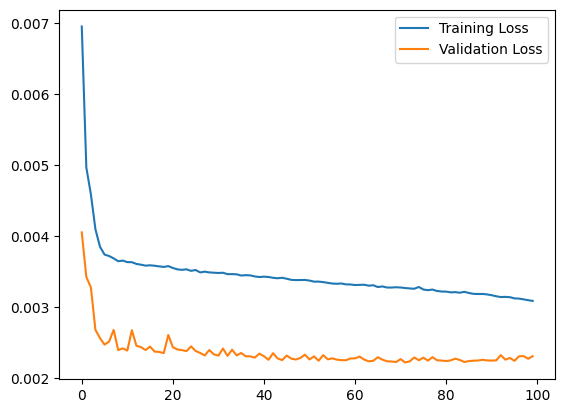

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean Squared Error: 13.272551802447257


In [50]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

In [ ]:
# Predict future dates

future_dates = pd.date_range(start=weather_data.index[-1] + pd.Timedelta(days=1), periods=10)  # Example: next 10 days
input_data = []

for date in future_dates:
    previous_data = weather_data.loc[date - pd.DateOffset(days=window_size):date - pd.DateOffset(days=1)]
    scaled_input_data = scaler.transform(previous_data)
    input_data.append(scaled_input_data)

input_data = np.array(input_data)

# Load the trained LSTM model
model = load_model("your_model.h5")  # Load your trained model here

# Predict temperature for future dates
predicted_temp = model.predict(input_data)
predicted_temp = scaler.inverse_transform(predicted_temp)

# Print predicted temperatures for future dates
for i, date in enumerate(future_dates):
    print("Predicted Max Temperature for", date.date(), ":", predicted_temp[i][0])


In [31]:
# Split training and test data
# 80-20 split
train = weather_data[:"2013-12-31"]
test = weather_data["2014-01-01":]

In [35]:
data = weather_data

# Define function to create input sequences and labels
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (number of time steps to look back)
seq_length = 10

# Create sequences and labels
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(5)  # Output layer with 5 units corresponding to the 5 weather variables
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling on predictions
predictions = scaler.inverse_transform(predictions)

Epoch 1/50


/opt/miniconda3/envs/cs542/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0185 - val_loss: 0.0041
Epoch 2/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 3/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 4/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 5/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 6/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 8/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 10/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 11/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 12/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [36]:
model.save('weather_prediction_model.h5')


In [42]:
# Define function to create input sequences
def create_input_sequence(data, seq_length):
    inputs = []
    start_index = len(data) - seq_length
    inputs.append(data[start_index:])
    return np.array(inputs)

# Load the trained LSTM model
# model = load_model('weather_prediction_model.h5')

# Define the sequence length
seq_length = 10

# Create input sequence for prediction
input_sequence = create_input_sequence(scaled_data, seq_length)
input_sequence
# # Make prediction
# predicted_data_scaled = model.predict(input_sequence)

# # Inverse scaling on predictions
# predicted_data = scaler.inverse_transform(predicted_data_scaled)

# # Extract predictions for the next few days
# predicted_temperatures = predicted_data[0][-3:, 2]  # Assuming temperature is the third column (index 2)

# print("Predicted temperatures for the next few days:")
# for i, temp in enumerate(predicted_temperatures, start=1):
#     print(f"Day {i}: {temp:.2f} °C")

array([[[0.        , 0.        , 0.31578947, 0.        , 0.3372093 ],
        [0.        , 0.        , 0.35789474, 0.        , 0.44186047],
        [0.02377807, 0.07326007, 0.28421053, 0.        , 0.3372093 ],
        [0.        , 0.        , 0.32631579, 0.        , 0.3255814 ],
        [0.        , 0.        , 0.33684211, 0.        , 0.38372093],
        [0.        , 0.        , 0.32631579, 0.        , 0.3255814 ],
        [0.        , 0.        , 0.35789474, 0.        , 0.37209302],
        [0.00528402, 0.        , 0.37894737, 0.        , 0.43023256],
        [0.00528402, 0.        , 0.4       , 0.        , 0.51162791],
        [0.        , 0.        , 0.36842105, 0.        , 0.34883721]]])